In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
common_path ='subject4/'
# Load the data from the CSV file
data = pd.read_csv(f'{common_path}merged_data.csv')

# Display basic information about the dataset
print("Basic Information about the dataset:")
print(data.info())

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55962 entries, 0 to 55961
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gidx                     55962 non-null  int64  
 1   timestamp                55962 non-null  int64  
 2   pupil_center_left_x      55962 non-null  float64
 3   pupil_center_left_y      55962 non-null  float64
 4   pupil_center_left_z      55962 non-null  float64
 5   pupil_center_right_x     55962 non-null  float64
 6   pupil_center_right_y     55962 non-null  float64
 7   pupil_center_right_z     55962 non-null  float64
 8   pupil_diameter_left      55962 non-null  float64
 9   pupil_diameter_right     55962 non-null  float64
 10  gaze_direction_left_x    55962 non-null  float64
 11  gaze_direction_left_y    55962 non-null  float64
 12  gaze_direction_left_z    55962 non-null  float64
 13  gaze_direction_right_x   55962 non-null


Descriptive Statistics:
       pupil_center_left_x  pupil_center_left_y  pupil_center_left_z  \
count         55962.000000         55962.000000         55962.000000   
mean             29.834371           -21.984889           -32.604390   
std               0.781709             0.544890             0.469364   
min              26.180000           -25.100000           -34.460000   
25%              29.140000           -22.430000           -32.970000   
50%              30.040000           -21.960000           -32.610000   
75%              30.440000           -21.540000           -32.230000   
max              32.120000           -20.190000           -26.950000   

       pupil_center_right_x  pupil_center_right_y  pupil_center_right_z  \
count          55962.000000          55962.000000          55962.000000   
mean             -32.254844            -22.491876            -32.299610   
std                0.775706              0.534437              0.469699   
min              -35.48000

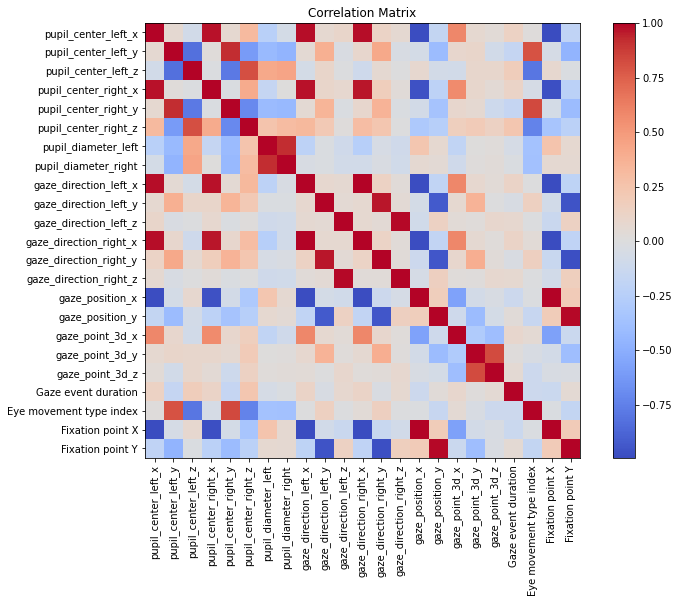

In [3]:
# Drop 'gidx' and 'timestamp' columns
data_without_time = data.drop(['gidx', 'timestamp'], axis=1)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(data_without_time.describe())

# Correlation matrix for numerical columns
print("\nCorrelation Matrix:")
correlation_matrix = data_without_time.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()



Pupil Diameter Statistics:
Mean:
pupil_diameter_left     3.904427
pupil_diameter_right    3.809284
dtype: float64

Median:
pupil_diameter_left     3.87
pupil_diameter_right    3.78
dtype: float64

Standard Deviation:
pupil_diameter_left     0.264977
pupil_diameter_right    0.272250
dtype: float64

Gaze Direction Statistics:
Mean:
gaze_direction_left_x    -0.022826
gaze_direction_left_y     0.130115
gaze_direction_left_z     0.974562
gaze_direction_right_x   -0.003452
gaze_direction_right_y    0.122042
gaze_direction_right_z    0.975123
dtype: float64

Median:
gaze_direction_left_x     0.0144
gaze_direction_left_y     0.1280
gaze_direction_left_z     0.9844
gaze_direction_right_x    0.0313
gaze_direction_right_y    0.1178
gaze_direction_right_z    0.9845
dtype: float64

Standard Deviation:
gaze_direction_left_x     0.145171
gaze_direction_left_y     0.064062
gaze_direction_left_z     0.087185
gaze_direction_right_x    0.148823
gaze_direction_right_y    0.067611
gaze_direction_right_z  

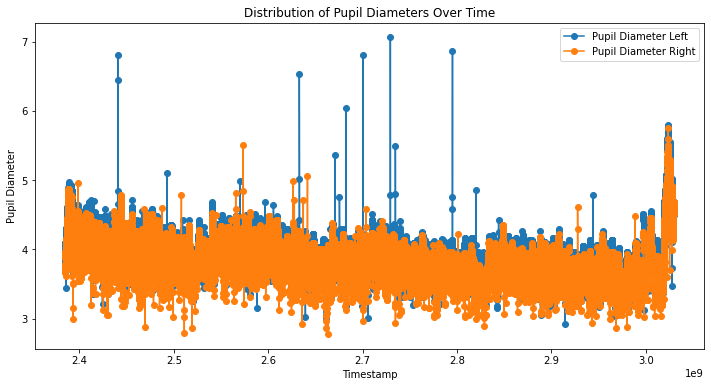

In [4]:
# Basic statistics for pupil diameters
pupil_diameters = data[['pupil_diameter_left', 'pupil_diameter_right']]
print("\nPupil Diameter Statistics:")
print("Mean:")
print(pupil_diameters.mean())
print("\nMedian:")
print(pupil_diameters.median())
print("\nStandard Deviation:")
print(pupil_diameters.std())

# Basic statistics for gaze directions
gaze_directions = data[['gaze_direction_left_x', 'gaze_direction_left_y', 'gaze_direction_left_z',
                        'gaze_direction_right_x', 'gaze_direction_right_y', 'gaze_direction_right_z']]
print("\nGaze Direction Statistics:")
print("Mean:")
print(gaze_directions.mean())
print("\nMedian:")
print(gaze_directions.median())
print("\nStandard Deviation:")
print(gaze_directions.std())

# Basic statistics for gaze positions
gaze_positions = data[['gaze_position_x', 'gaze_position_y', 'gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z']]
print("\nGaze Position Statistics:")
print("Mean:")
print(gaze_positions.mean())
print("\nMedian:")
print(gaze_positions.median())
print("\nStandard Deviation:")
print(gaze_positions.std())

# Explore the distribution of data points over time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['pupil_diameter_left'], label='Pupil Diameter Left', linestyle='-', marker='o')
plt.plot(data['timestamp'], data['pupil_diameter_right'], label='Pupil Diameter Right', linestyle='-', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Pupil Diameter')
plt.title('Distribution of Pupil Diameters Over Time')
plt.legend()
plt.show()


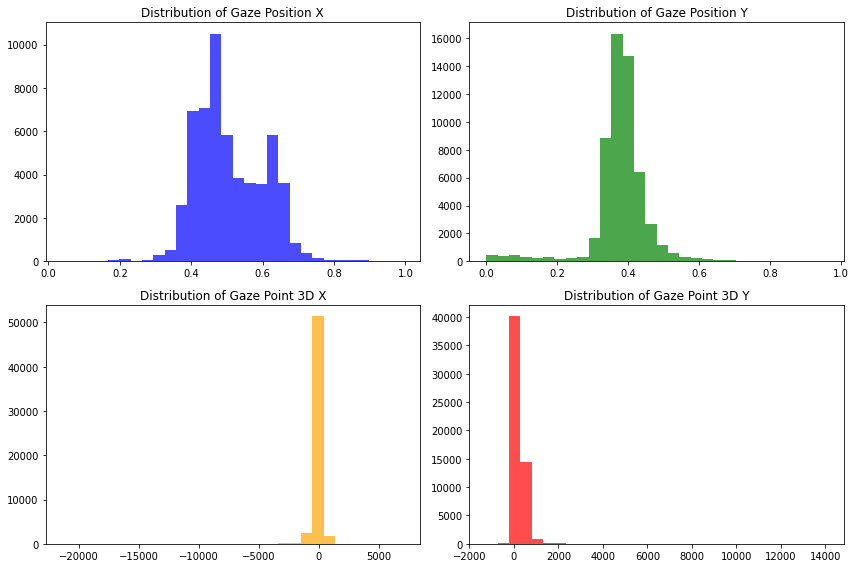

In [5]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(gaze_positions['gaze_position_x'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Gaze Position X')

plt.subplot(2, 2, 2)
plt.hist(gaze_positions['gaze_position_y'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Gaze Position Y')

plt.subplot(2, 2, 3)
plt.hist(gaze_positions['gaze_point_3d_x'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Gaze Point 3D X')

plt.subplot(2, 2, 4)
plt.hist(gaze_positions['gaze_point_3d_y'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Gaze Point 3D Y')

plt.tight_layout()
plt.show()


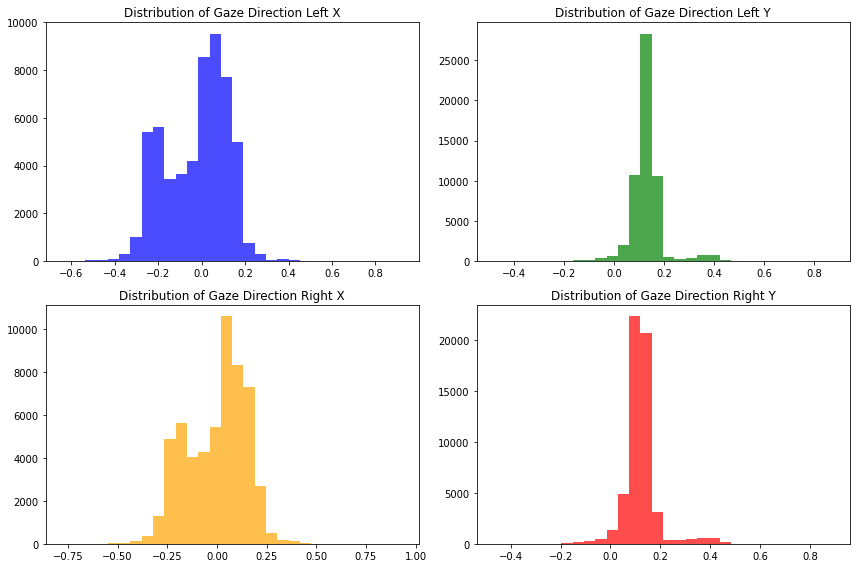

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(gaze_directions['gaze_direction_left_x'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Gaze Direction Left X')

plt.subplot(2, 2, 2)
plt.hist(gaze_directions['gaze_direction_left_y'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Gaze Direction Left Y')

plt.subplot(2, 2, 3)
plt.hist(gaze_directions['gaze_direction_right_x'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Gaze Direction Right X')

plt.subplot(2, 2, 4)
plt.hist(gaze_directions['gaze_direction_right_y'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Gaze Direction Right Y')

plt.tight_layout()
plt.show()


Average Pupil Diameters:
pupil_diameter_left     3.904427
pupil_diameter_right    3.809284
dtype: float64


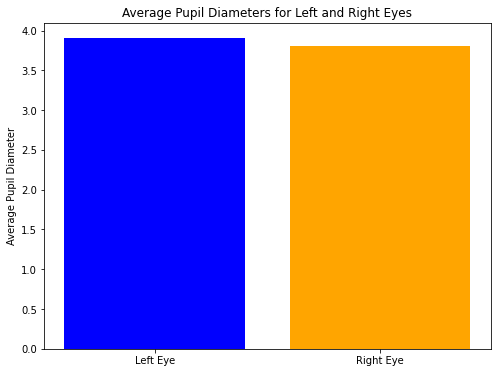

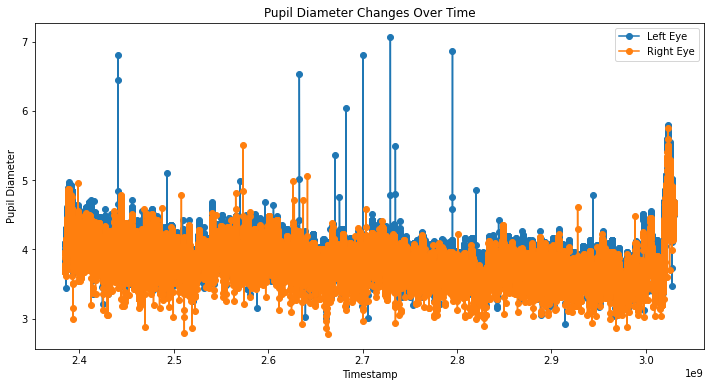

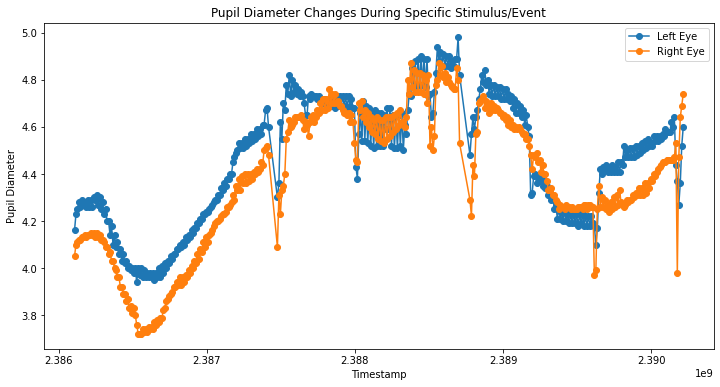

In [7]:

# Compare average pupil diameters between left and right eyes
average_pupil_diameters = data[['pupil_diameter_left', 'pupil_diameter_right']].mean()
print("\nAverage Pupil Diameters:")
print(average_pupil_diameters)

# Plot the average pupil diameters for left and right eyes
plt.figure(figsize=(8, 6))
plt.bar(['Left Eye', 'Right Eye'], average_pupil_diameters, color=['blue', 'orange'])
plt.title('Average Pupil Diameters for Left and Right Eyes')
plt.ylabel('Average Pupil Diameter')
plt.show()

# Examine changes in pupil diameter over time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['pupil_diameter_left'], label='Left Eye', linestyle='-', marker='o')
plt.plot(data['timestamp'], data['pupil_diameter_right'], label='Right Eye', linestyle='-', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Pupil Diameter')
plt.title('Pupil Diameter Changes Over Time')
plt.legend()
plt.show()

# Analyze pupil diameter in response to specific stimuli or events
# You can filter data based on specific conditions and visualize the changes
# Example: Analyzing pupil diameter during a specific time range
start_time = data['timestamp'][100]  # Example start time (adjust according to your data)
end_time = data['timestamp'][500]    # Example end time (adjust according to your data)

stimulus_data = data[(data['timestamp'] >= start_time) & (data['timestamp'] <= end_time)]

plt.figure(figsize=(12, 6))
plt.plot(stimulus_data['timestamp'], stimulus_data['pupil_diameter_left'], label='Left Eye', linestyle='-', marker='o')
plt.plot(stimulus_data['timestamp'], stimulus_data['pupil_diameter_right'], label='Right Eye', linestyle='-', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Pupil Diameter')
plt.title('Pupil Diameter Changes During Specific Stimulus/Event')
plt.legend()
plt.show()

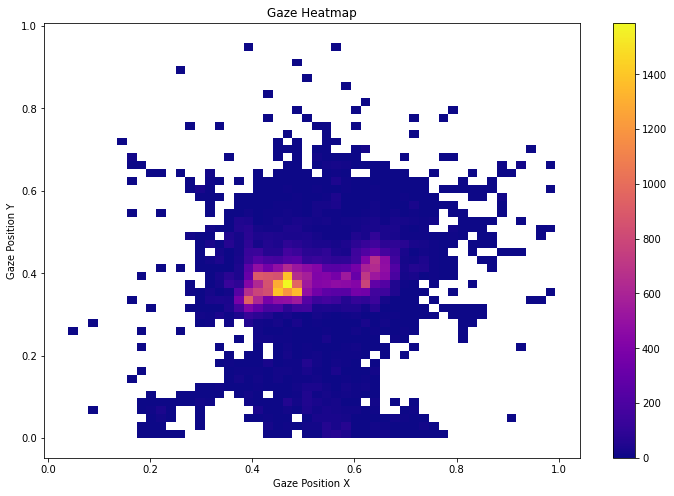

In [8]:
# Create a heatmap based on gaze positions
plt.figure(figsize=(12, 8))

# Adjust bin size as needed for more or less granularity
heatmap = sns.histplot(data=data, x='gaze_position_x', y='gaze_position_y', bins=(50, 50), cbar=True, cmap='plasma')

plt.title('Gaze Heatmap')
plt.xlabel('Gaze Position X')
plt.ylabel('Gaze Position Y')

plt.show()
